<a href="https://colab.research.google.com/github/Munchkinland/-demographic-data-analyzer/blob/main/DECISIONTREEPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

In [51]:
link = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
total_data = pd.read_csv(link)
total_data.to_csv('diabetes.csv', index=False)


Data variables dictionary

✅Pregnancies. Número de embarazos del paciente (numérico)

✅Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)

✅BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)

✅SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)

✅Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

✅BMI. Índice de masa corporal (numérico)

✅DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

✅Age. Edad del paciente (numérico)

💥Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)



In [52]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


DESCRIPTIVE DATA ANALYTICS

In [54]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


EDA

UNIVARIANTE

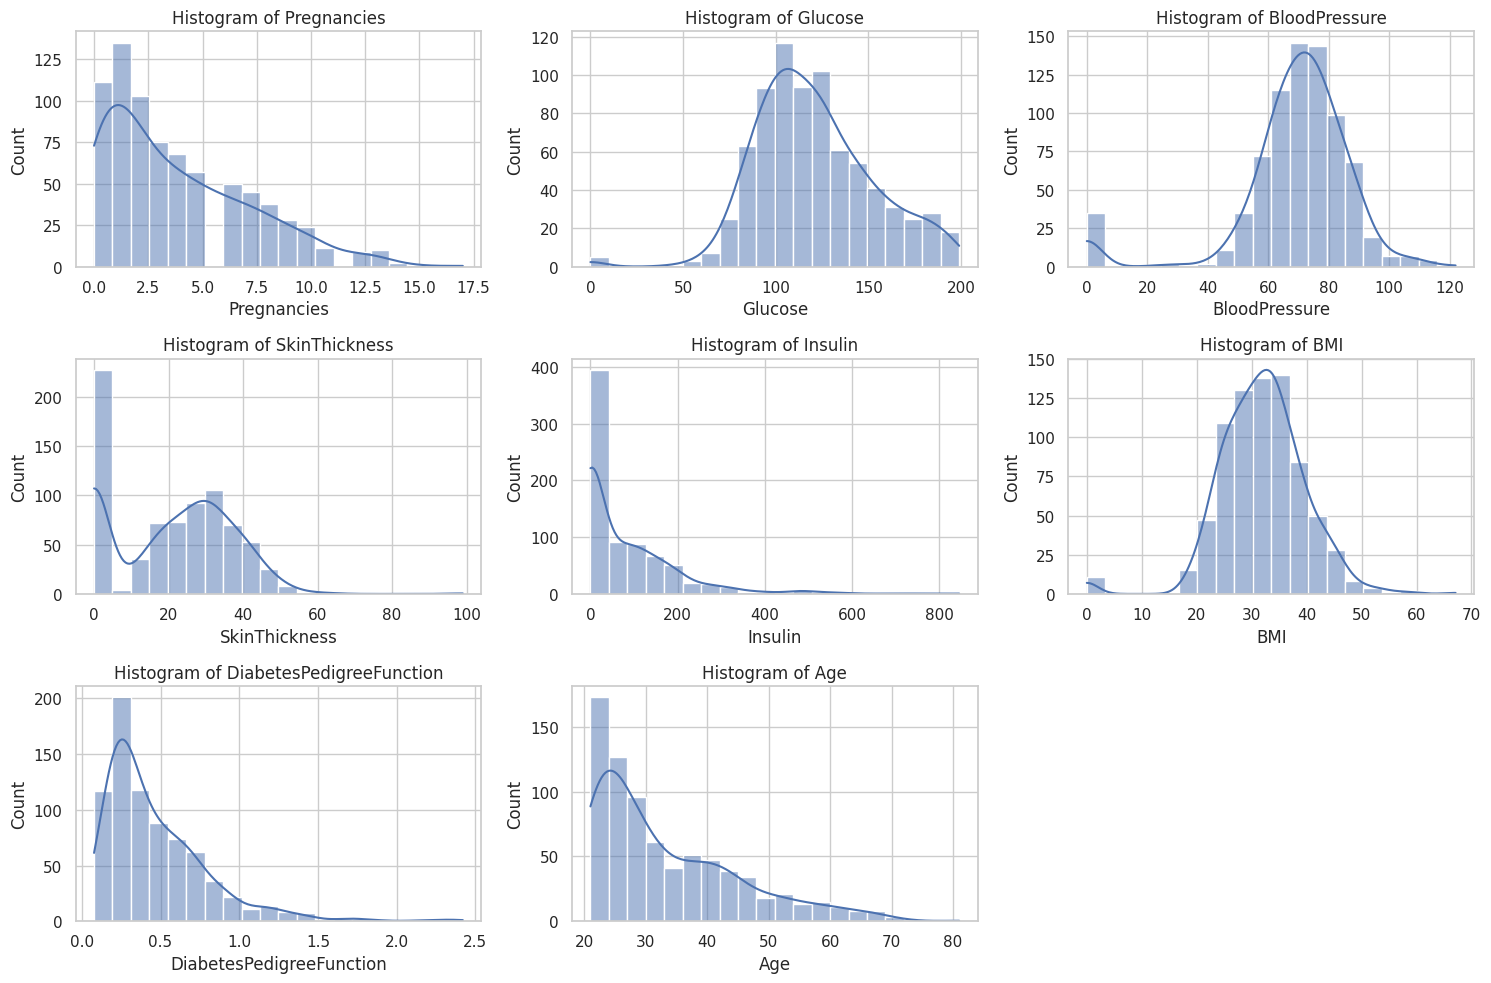

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Numeric variables
numeric_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Create histograms for each
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(total_data[variable], bins=20, kde=True)
    plt.title(f'Histogram of {variable}')

plt.tight_layout()
plt.show()

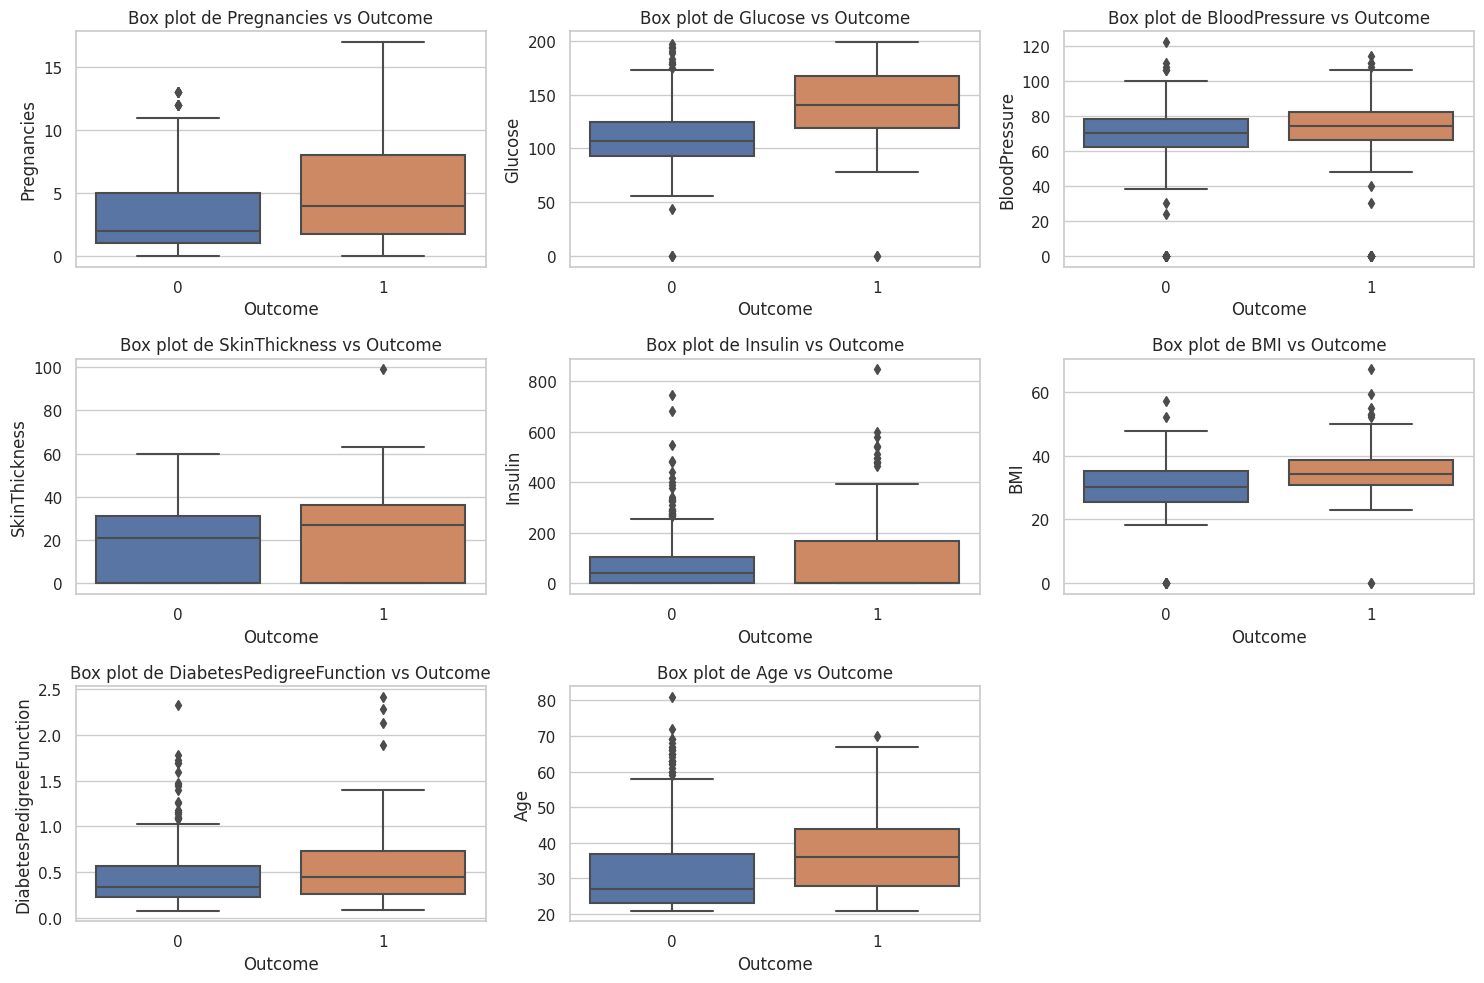

In [56]:
# box plots
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=variable, data=total_data)
    plt.title(f'Box plot de {variable} vs Outcome')
plt.tight_layout()
plt.show()

MULTIVARIANTE

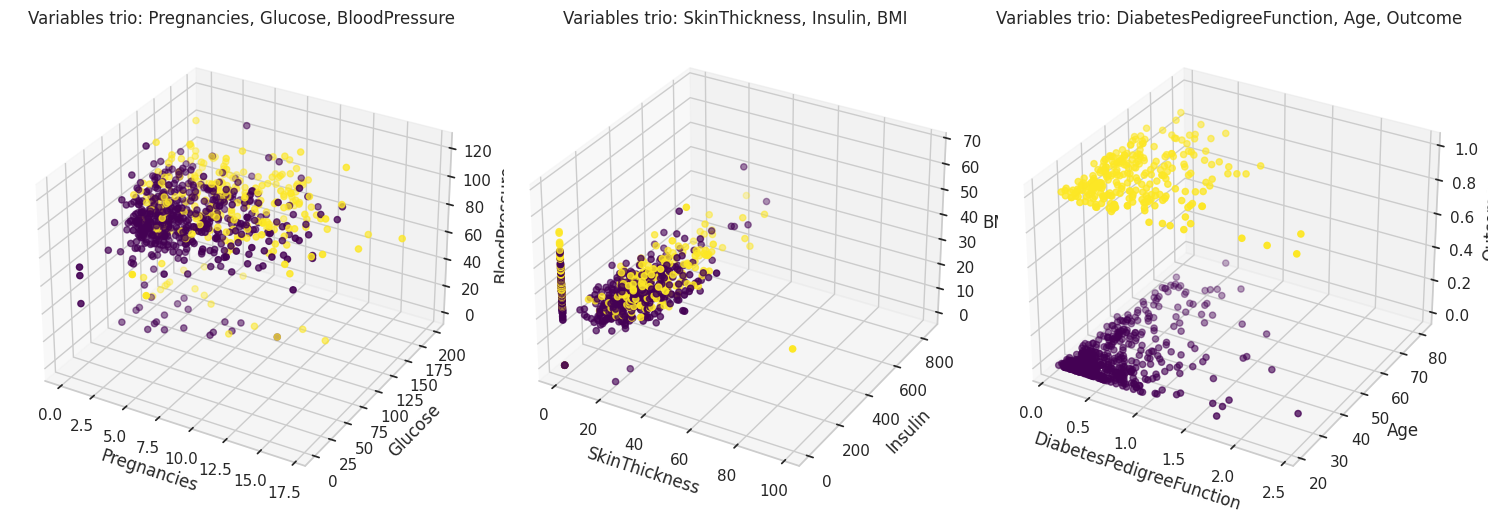

In [57]:
# Create 3D graphs using matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Select trios variables
trios_variables = [
    ["Pregnancies", "Glucose", "BloodPressure"],
    ["SkinThickness", "Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age", "Outcome"]
]

# Creating 3D graphs
fig = plt.figure(figsize=(15, 5))

for i, trio in enumerate(trios_variables, start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.scatter(total_data[trio[0]], total_data[trio[1]], total_data[trio[2]], c=total_data["Outcome"], cmap='viridis')
    ax.set_xlabel(trio[0])
    ax.set_ylabel(trio[1])
    ax.set_zlabel(trio[2])
    ax.set_title(f'Variables trio: {trio[0]}, {trio[1]}, {trio[2]}')

plt.tight_layout()
plt.show()

PARES

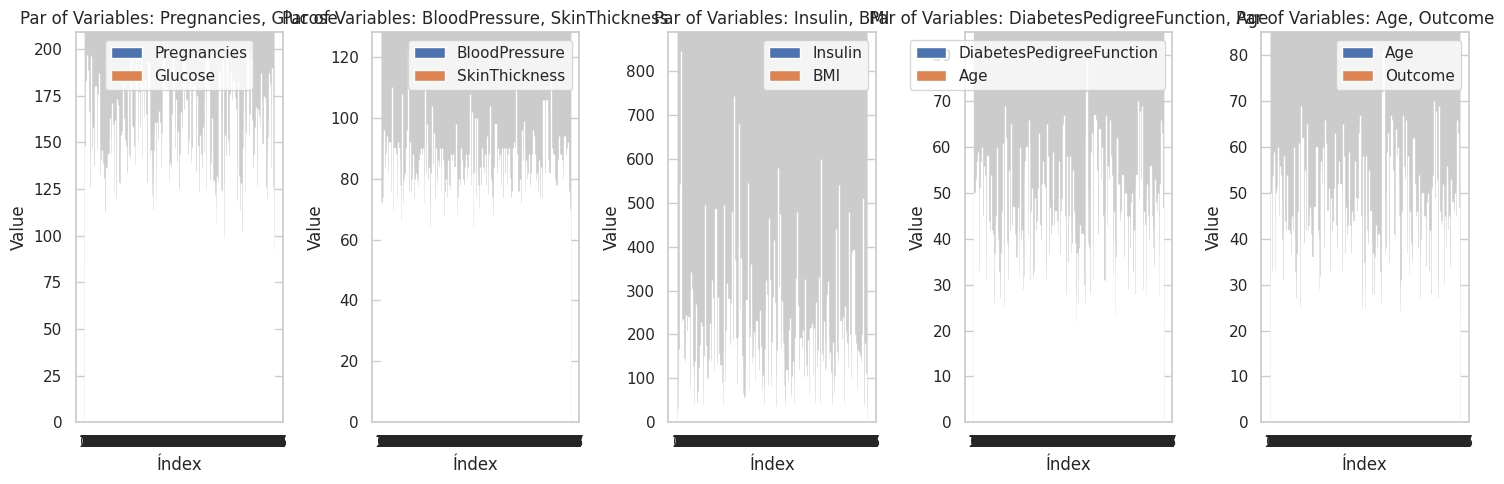

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Selecting by par
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"],
    ["Age", "Outcome"]
]

# Create Clustered Bar Subcharts
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Config bars and labels
    positions = np.arange(len(total_data))

    # Config width of bars
    width = 0.4

    # Create agruping bars
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Config labels and legends
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índex')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Par of Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()

TRIOS

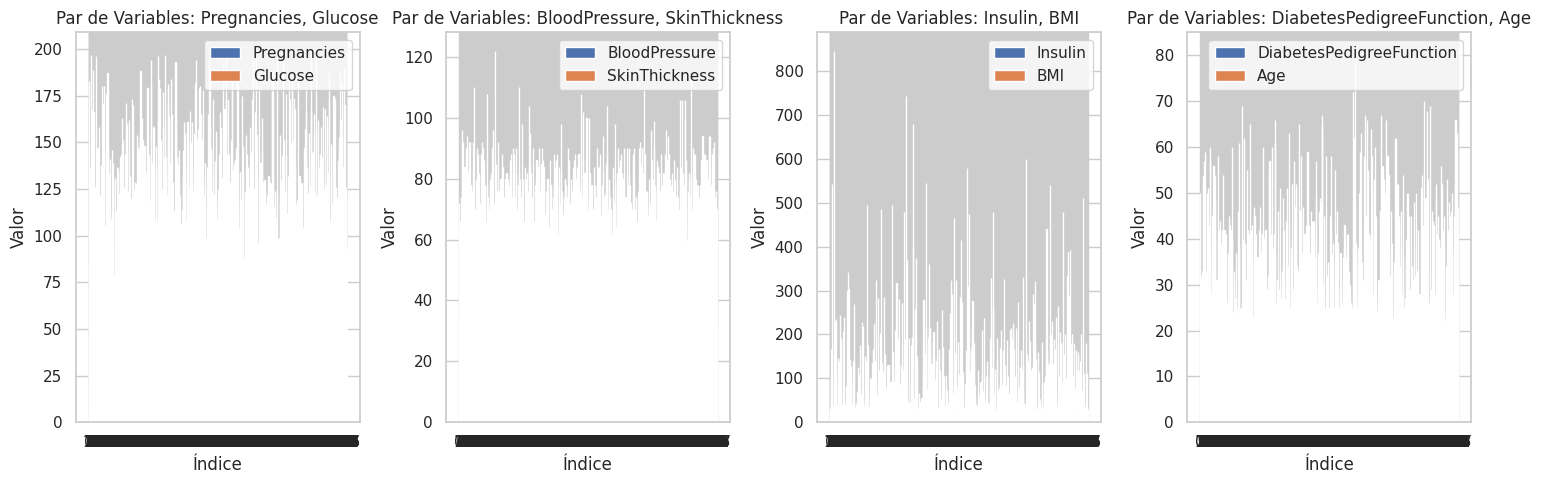

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Selection par of variables to plot
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"]
]

# Create Clustered Bar Subcharts
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Configure bar positions
    positions = np.arange(len(total_data))

    # Set the width of the bars
    width = 0.4

    # Create the bar chart
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Config labels and legends
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índice')
    axes[i].set_ylabel('Valor')
    axes[i].set_title(f'Par de Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()

CORRELATION MATRIX

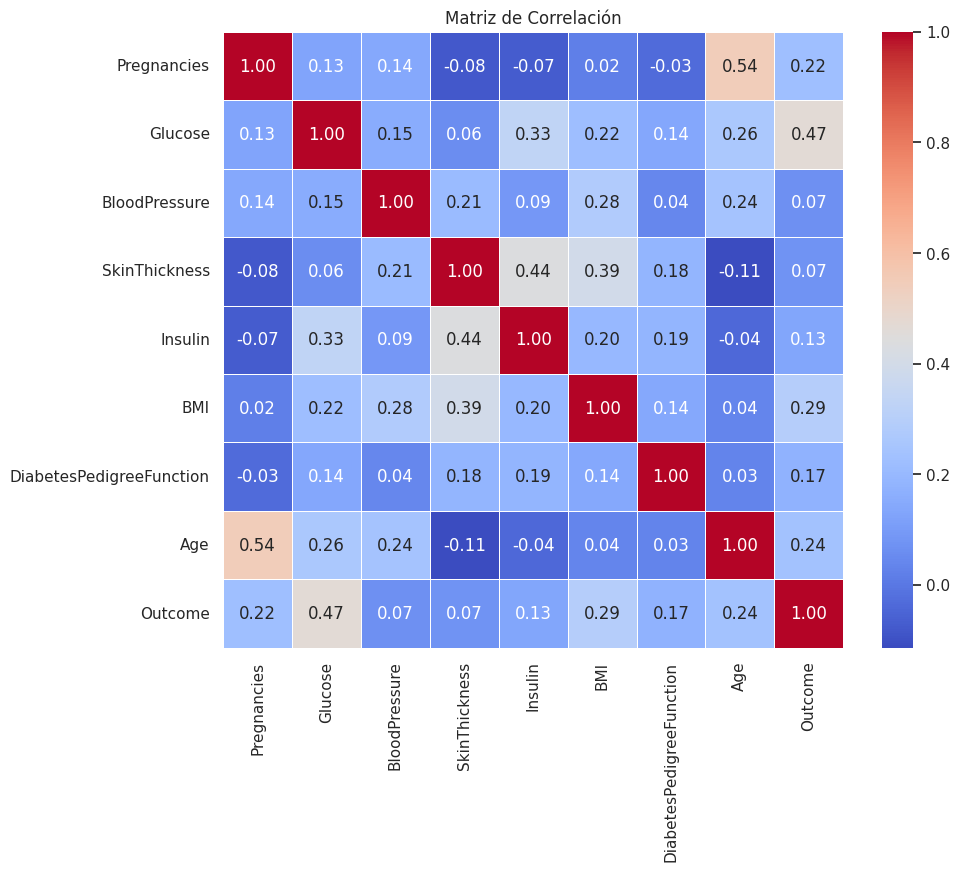

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = total_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

PAIR PLOTS

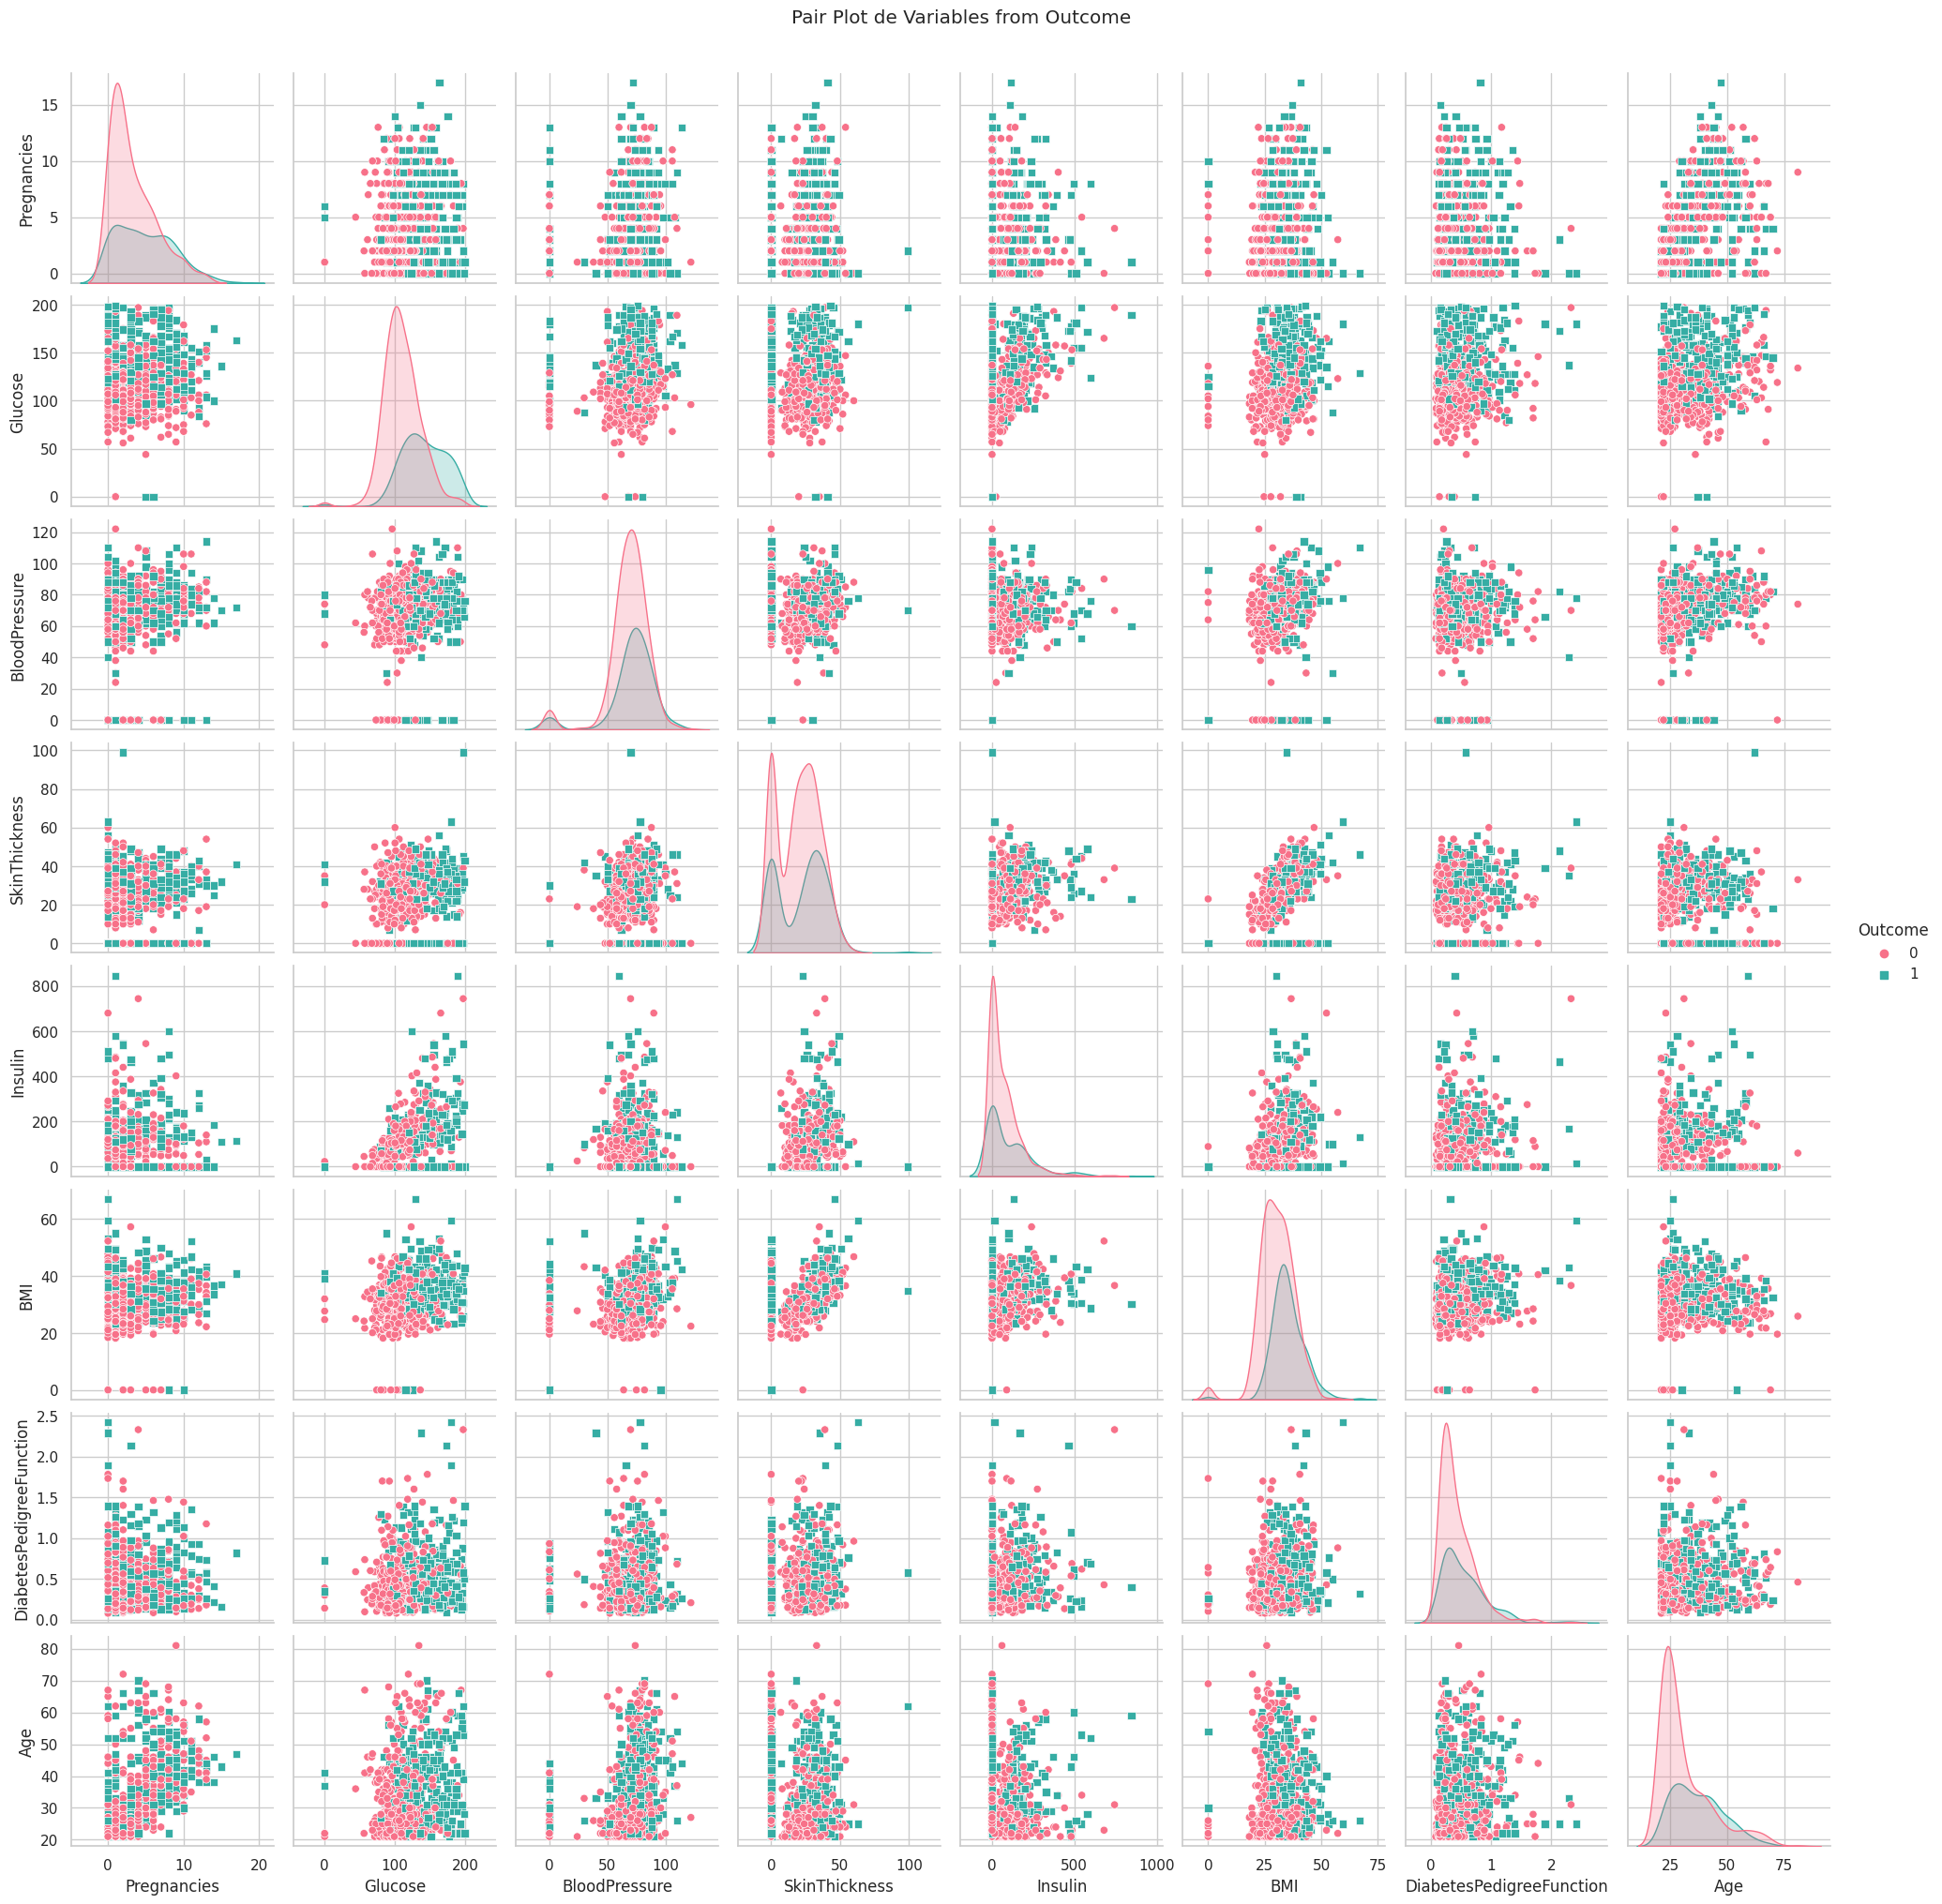

In [61]:
# Select all variables
variables_interes = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Create a subset of the data
subset_data = total_data[variables_interes]

# Creete pair plot
sns.pairplot(subset_data, hue="Outcome", markers=["o", "s"], palette="husl")
plt.suptitle("Pair Plot de Variables from Outcome", y=1.02)
plt.show()

FEATURE ENGINEERING - DATA CLEANING

ELIMINAR VALORES CON 0 VALUES

In [62]:
#COUNTING
# Count the number of rows with at least a value 0
num_filas_con_0 = (total_data == 0).any(axis=1).sum()

# Print the number of rows with 0 values
print(f"Number of rows including 0 values: {num_filas_con_0}")
# Filtrar las filas con al menos un valor igual a 0
filas_con_0 = total_data[(total_data == 0).any(axis=1)]

# Show resulting rows
print("Filas con al menos un valor igual a 0:")
print(filas_con_0)

Number of rows including 0 values: 657
Filas con al menos un valor igual a 0:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Ag

In [63]:
#DELETE
# Filtrar las filas que no contienen 0 en las columnas especificadas
total_data = total_data[~(total_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] == 0).any(axis=1)]

# Imprimir el nuevo número de filas
print(f"Number of rows after removing 0 values: {len(total_data)}")

Number of rows after removing 0 values: 393


IQR & LIMITS

In [64]:
out_of_limit_values = {}  # Inicializar el diccionario fuera del bucle

# Calculate upper and lower limits for outlier detection for each variable
for variable in total_data.columns:
    variable_stats = total_data[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    # Identify values outside the limits
    upper_values = total_data[total_data[variable] > upper_limit]
    lower_values = total_data[total_data[variable] < lower_limit]

    # Store count in the dictionary
    out_of_limit_values[variable] = {
        'upper': len(upper_values),
        'lower': len(lower_values)
    }

    # Print the results
    print(f"\nUpper and lower limits for outlier detection of {variable}:")
    print(f"Upper: {round(upper_limit, 2)}, Lower: {round(lower_limit, 2)}, Interquartile Range: {round(iqr, 2)}")
    print(f"Number of values above the upper limit: {len(upper_values)}")
    print(f"Number of values below the lower limit: {len(lower_values)}")


Upper and lower limits for outlier detection of Pregnancies:
Upper: 11.0, Lower: -5.0, Interquartile Range: 4.0
Number of values above the upper limit: 11
Number of values below the lower limit: 0

Upper and lower limits for outlier detection of Glucose:
Upper: 209.0, Lower: 33.0, Interquartile Range: 44.0
Number of values above the upper limit: 0
Number of values below the lower limit: 0

Upper and lower limits for outlier detection of BloodPressure:
Upper: 102.0, Lower: 38.0, Interquartile Range: 16.0
Number of values above the upper limit: 4
Number of values below the lower limit: 3

Upper and lower limits for outlier detection of SkinThickness:
Upper: 61.0, Lower: -3.0, Interquartile Range: 16.0
Number of values above the upper limit: 1
Number of values below the lower limit: 0

Upper and lower limits for outlier detection of Insulin:
Upper: 359.5, Lower: -92.5, Interquartile Range: 113.0
Number of values above the upper limit: 25
Number of values below the lower limit: 0

Upper a

In [65]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


TREE DECISION

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Supongamos que total_data es tu DataFrame

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = total_data.drop("Outcome", axis=1)
y = total_data["Outcome"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Seleccionar características con SelectKBest
selection_model = SelectKBest(k=7)
X_train_sel = selection_model.fit_transform(X_train, y_train)
X_test_sel = selection_model.transform(X_test)

# Entrenar un modelo de Decision Tree Classifier con las características seleccionadas
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_sel, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_sel)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.751269035532995


In [67]:
import pickle

# Guardar el modelo entrenado
with open('decision_tree_model_total_data.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

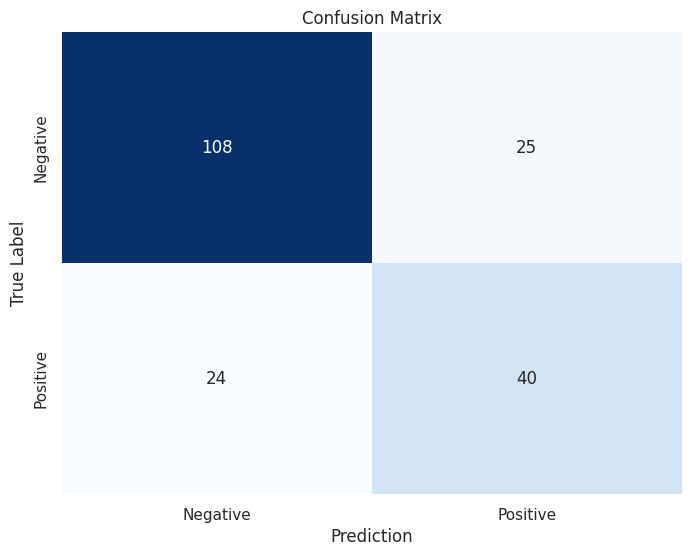

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

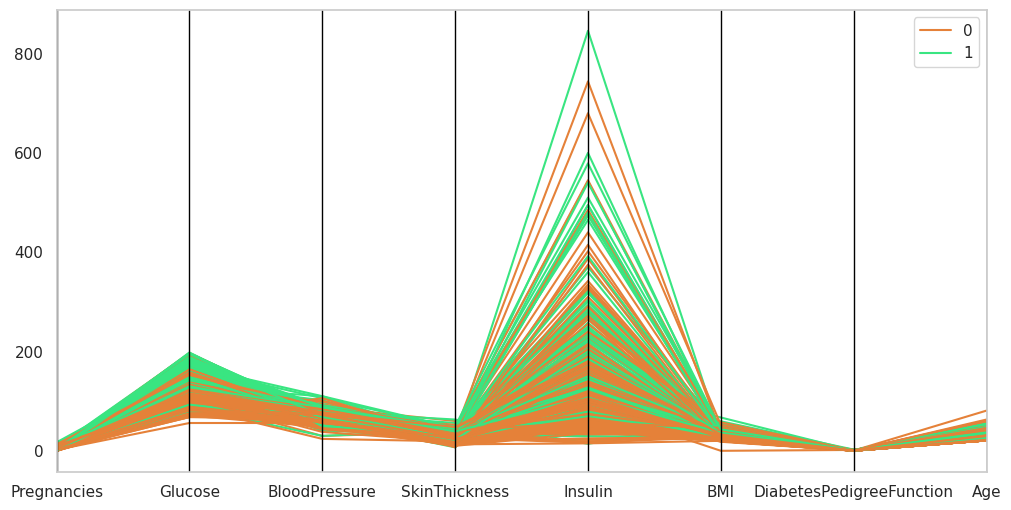

In [69]:
#Graphics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [70]:
# Crear DataFrames con las características seleccionadas y las etiquetas de clase
train_data_sel = pd.DataFrame(X_train_sel, columns=[f"feature_{i}" for i in range(X_train_sel.shape[1])])
train_data_sel["Outcome"] = y_train.values

test_data_sel = pd.DataFrame(X_test_sel, columns=[f"feature_{i}" for i in range(X_test_sel.shape[1])])
test_data_sel["Outcome"] = y_test.values

# Guardar los conjuntos de entrenamiento y prueba
train_data_sel.to_csv("clean_train_total_data.csv", index=False)
test_data_sel.to_csv("clean_test_total_data.csv", index=False)

OPTIMIZACION DEL MODELO

In [71]:
# Dividir los conjuntos de datos en características (X) y variable objetivo (y)
X_train = train_data_sel.drop(["Outcome"], axis=1)
y_train = train_data_sel["Outcome"]
X_test = test_data_sel.drop(["Outcome"], axis=1)
y_test = test_data_sel["Outcome"]

Optimización básica

In [72]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Accuracy on training set: 0.847
Accuracy on test set: 0.751
Precisión: 0.751269035532995


In [73]:
import pickle

# Guardar el modelo entrenado
with open('decision_tree_model_total_data_basic_opt.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [75]:
#Optimizacion básica v1

In [76]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Seleccionar características con SelectKBest
selection_model = SelectKBest(k=7)
X_train_k_best = selection_model.fit_transform(X_train, y_train)
X_test_k_best = selection_model.transform(X_test)

# Definir el rango de valores para los parámetros que deseas probar
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5, 15],
    "random_state": [42],
}

# Crear el modelo de árbol de decisión
base_model = DecisionTreeClassifier()

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy')

# Aplicar la búsqueda en cuadrícula a las características seleccionadas
grid_search.fit(X_train_k_best, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado con los mejores parámetros
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de entrenamiento y prueba con el mejor modelo
train_predictions = best_model.predict(X_train_k_best)
test_predictions = best_model.predict(X_test_k_best)

# Evaluar la precisión del modelo
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Best Parameters:", best_params)
print("Accuracy on training set: {:.3f}".format(train_accuracy))
print("Accuracy on test set: {:.3f}".format(test_accuracy))
# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'random_state': 42}
Accuracy on training set: 0.847
Accuracy on test set: 0.751
Precisión: 0.751269035532995


In [77]:
import pickle

# Guardar el modelo entrenado
with open('decision_tree_model_total_data_basic_optV1.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

Optimización Avanzada (Utilizando CV)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    "criterion": ['log_loss', 'entropy', 'gini'],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 10, 20, 30],
    "min_impurity_decrease": [0.0, 0.1, 0.2],
    "random_state": [42],
    "class_weight": [None, "balanced"],
    "ccp_alpha": [0.0, 0.1, 0.2]
}

# Crear el modelo de árbol de decisiones
tree_model = DecisionTreeClassifier()

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_hyperparams = grid_search.best_params_

# Crear el modelo con los mejores hiperparámetros
best_model = DecisionTreeClassifier(**best_hyperparams)

# Entrenar el modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.3f}")


Accuracy on test set: 0.726


In [79]:
import pickle

# Guardar el modelo entrenado
with open('decision_tree_model_total_data_opt_avanzadaCV5.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

Optimización Avanzada (Sin CV asegurando máxima aleatoriedad)

In [80]:
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

hyperparams = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 10, 20, 30],
    "min_impurity_decrease": [0.0, 0.1, 0.2],
    "random_state": [42],
    "class_weight": [None, "balanced"],
    "ccp_alpha": [0.0, 0.1, 0.2]
}

accs = []
for combination in ParameterGrid(hyperparams):
    model = DecisionTreeClassifier(**combination)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accs.append(accuracy_score(y_train, y_pred))

best_acc = max(accs)
best_combination = ParameterGrid(hyperparams)[accs.index(best_acc)]
best_model = DecisionTreeClassifier(**best_combination)
best_model.fit(X_train_sel, y_train)

y_pred = best_model.predict(X_train_sel)
accuracy_score(y_train, y_pred)



1.0

In [81]:
y_pred = best_model.predict(X_test_sel)
accuracy_score(y_test, y_pred)
#y_pred

0.751269035532995

In [82]:
import pickle

# Guardar el modelo entrenado
with open('decision_tree_model_total_data_opt_avanzada_max_aleatoriedad.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [83]:
# Comprobar el accuracy del mejor modelo en el conjunto de prueba
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Best Parameters:", best_combination)
print("Accuracy on training set: {:.3f}".format(best_acc))
print("Accuracy on test set: {:.3f}".format(test_accuracy))


Best Parameters: {'splitter': 'best', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0.0}
Accuracy on training set: 1.000
Accuracy on test set: 0.751


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
